In [1]:
import spectral as sp
import spectral.io.envi as envi

import numpy as np
import scipy as sc

import pandas as pd
import sklearn as sk
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns

import joblib

In [2]:
img = envi.open("data/VNIR and SWIR interval/CMM-111_195_extracted_image.hdr", "data/VNIR and SWIR interval/CMM-111_195_extracted_image.img")

In [3]:
hypr = img.load()
print(f"image shape: {hypr.shape}")
wavelengths = img.bands.centers
print(f"wavelength range: {(wavelengths[0], wavelengths[-1])}")

image shape: (527, 337, 411)
wavelength range: (463.31, 2476.54)


In [4]:
img_rgd = sp.get_rgb(img)

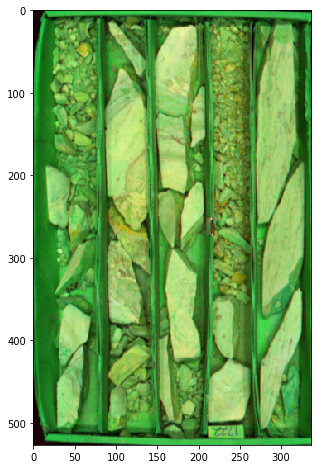

In [5]:
plt.figure(figsize=(10,8))
plt.imshow(img_rgd)
plt.show()

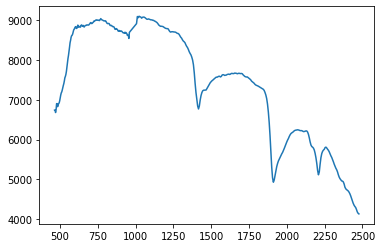

In [16]:
h = hypr[150,120,:].reshape(-1)
plt.plot(wavelengths, h)
plt.show()

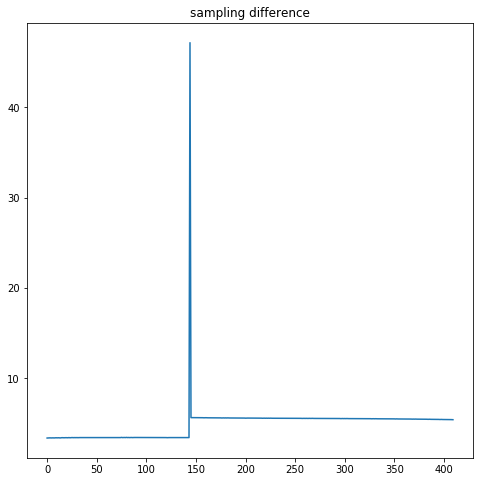

In [7]:
plt.figure(figsize=(8,8))
plt.title("sampling difference")
plt.plot(np.diff(wavelengths))
plt.show()

In [8]:
img620 = envi.open('data/original_data/324620.hdr', 'data/original_data/324620.dat')
wavelengths620 = img620.bands.centers

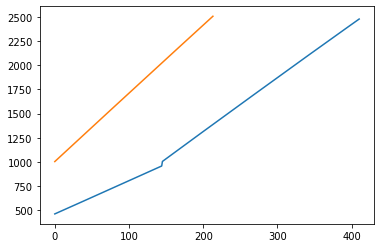

In [35]:
plt.plot(wavelengths)
plt.plot(wavelengths620)
plt.show()

In [26]:
interpolator = sc.interpolate.interp1d(wavelengths, h)

In [11]:
print((min(wavelengths), max(wavelengths)))
print((min(wavelengths620), max(wavelengths620)))

(463.31, 2476.54)
(1004.049988, 2505.379883)


In [12]:
h620 = img620.load()
h620 = h620[65:132, 122:205, :].reshape(-1,214)

In [13]:
m = np.mean(h620, axis=0)
s = np.std(h620, axis=0)

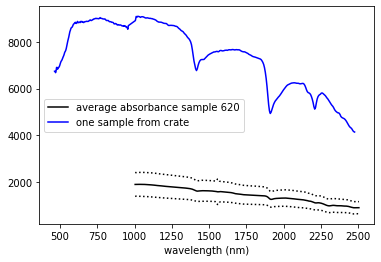

In [14]:
plt.plot(wavelengths620, m-3*s, ':k')
plt.plot(wavelengths620, m+3*s, ':k')
plt.plot(wavelengths620, m, '-k', label='average absorbance sample 620')
plt.plot(wavelengths, h, '-b', label='one sample from crate')
plt.xlabel('wavelength (nm)')
plt.legend()
plt.show()